### **Teoría de Markowitz**
Fue desarrollado por el economista estadounidense Harry Markowitz en 1952. Básicamente, Markowitz buscó maximizar los beneficios de una cartera de inversión para un nivel de riesgo determinado en función de los pesos o ponderaciones asignados a cada una de las acciones que conforman la cartera de inversión. La teoría se fundamenta en la definición de la diversificación para mitigar el riesgo único que se encuentra presente en los instrumentos financieros.

### **Supuestos de la Teoría de Markowitz**
1. Toma en cuenta que todos los individuos (inversionistas) son económicamente racionales. Por ello, se concluye que buscan maximizar la utilidad esperada.
2. Los inversionistas presentan aversión al riesgo, por tanto, si se poseen dos carteras de inversión con la misma rentabilidad se optará por elegir la cartera que presente menor varianza (minimizar el riesgo).
3. Las curvas de utilidad del inversión son monótonas crecientes. Si cuentan con dos carteras de inversión con la misma varianza optarán por elegir la cartera que tenga la mayor rentabilidad.
**¿Qué es una función monótona creciente?**
Una función monótona creciente es aquella que conserva el orden dado a lo largo de su trayectoria, tal vez, pueda ser útil asimilar el concepto comparándolo con la definición de la **tendencia** que presenta la función de utilidad.

Si se tiene una función de utilidad $f(x)$, será monótona creciente sólo si:
$f'(x) > 0$ ^ $f'(x) < 0$

4. La función de utilidad esperada del inversor depende únicamente del rendimiento esperado como medida de rentabilidad esperada y también guarda relación inversa con la varianza o desviación estándar como medida de riesgo.
5. La curva de indiferencia del inversionista es creciente porque al asumir un mayor riesgo impacta en el incremento del beneficio. También, las curvas de indiferencia son convexas, un aumento del riesgo incrementa en mayor medida el beneficio.
6. Los mercados financieros siguen los fundamentos de los supuestos de competencia perfecta descritos en economía: La información es completa para todos los participantes del mercado, todos los participantes son precio-aceptantes (tanto el consumidor como el vendedor no pueden interferir en la valuación del precio), no existen costos de transacción, impuestos e inflación.
7. No se puede realizar ventas en corto. Por ello, las ponderaciones $w_i >= 0$ asignadas a las adquisiciones de acciones de la cartera deben ser mayor o igual a 0.

**Dado que se ha expuesto los supuestos básicos de la Teoría de Markowitz, se procederá a realizar el análisis financiero de un grupo de acciones con el uso del lenguaje de programación Python que permite agilizar el proceso de análisis con extensa información extraída de Yahoo Finance con el API de Python.**

**Funciones Matemáticas Básicas**

Rendimiento esperado: $E(R) = \sum_{i=1}^{n}x_{i}R_i$

Ponderaciones: $X = x_1 + x_2 +x_3 + x_4 + x_n$

Covarianza: $σ^2_p = \sum_{i}^{n}\sum_{i}^{n}x_ix_jσ_ij$ 

**Las empresas que se evaluarán en el presente proyecto son TESLA, AIRBNB, APPLE INC, MICROSOFT CORPORATION, ALPHABET INC y META, AMAZON, ALIBABA, VOLKSWAGEN, AMERICAN EAGLE OUTFITTERS, JPMORGAN CHASE & CO, PAYPAL HOLDING INC y NVIDIA CORPORATION.**

En el presente proyecto se utilizarán las siguientes librerías:
PANDAS, MATPLOTLIB, NUMPY, PANDAS_DATAREADER.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

<AxesSubplot:title={'center':'Price Historical TESLA'}, xlabel='Date'>

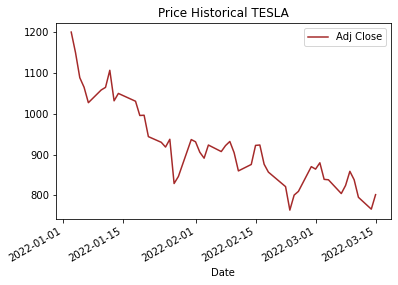

In [2]:
#Prueba de conexión con Yahoo Finance
data = wb.DataReader('TSLA', data_source='yahoo', start='2022-01-01')['Adj Close']
data = pd.DataFrame(data)
data
data.plot(title='Price Historical TESLA', color='brown')

In [3]:
import datetime
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,2,28)
def getStocks(stock):
    df = pd.DataFrame()
    for element in stock:
        df[element] = wb.DataReader(element, data_source='yahoo', start=start, end=end)['Adj Close']
    return df

In [4]:
list_stocks = ['TSLA', 'ABNB', 'AAPL', 'MSFT', 'GOOG', 'FB', 'AMZN', 'BABA', 'VWAGY', 'AEO', 'JPM', 'PYPL', 'NVDA']
stocks = getStocks(list_stocks)
stocks

,TSLA,ABNB,AAPL,MSFT,GOOG,FB,AMZN,BABA,VWAGY,AEO,JPM,PYPL,NVDA
Date,,,,,,,,,,,,,
2021-01-04,729.770020,139.149994,128.453445,215.434967,1728.239990,268.940002,3186.629883,227.850006,19.954760,19.127472,122.054932,231.919998,130.998260
2021-01-05,735.109985,148.300003,130.041611,215.642776,1740.920044,270.970001,3218.510010,240.399994,20.210339,19.916828,122.719070,234.910004,133.907715
2021-01-06,755.979980,142.770004,125.664207,210.051300,1735.290039,263.309998,3138.379883,227.610001,20.259489,21.052736,128.481445,226.830002,126.013443
2021-01-07,816.039978,151.270004,129.952286,216.028748,1787.250000,268.739990,3162.159912,226.899994,20.618280,21.351149,132.700668,235.039993,133.300842
2021-01-08,880.020020,149.770004,131.073914,217.344971,1807.209961,267.570007,3182.699951,236.190002,20.436428,21.418533,132.847183,242.460007,132.629059
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,821.530029,165.240005,164.320007,287.720001,2588.050049,202.080002,3003.949951,112.930000,27.990000,20.574598,151.869995,103.169998,233.860153
2022-02-23,764.039978,150.039993,160.070007,280.269989,2551.699951,198.449997,2896.540039,109.720001,27.250000,19.822109,148.690002,100.720001,223.831863
2022-02-24,800.770020,158.259995,162.740005,294.589996,2653.469971,207.600006,3027.159912,108.930000,25.885000,20.713213,144.550003,105.019997,237.439545


**Gráfico de velas que permite aplicar el análisis técnico en el trayecto del precio de las acciones**
En el presente trabajo de investigación, aplicaré el gráfico del candelabros o velas a los precios de las acciones de TESLA, AIRBNB, APPLE Y META teniendo en cuenta el histórico del '2021-01-01' al '2022-02-28'. 

In [95]:
from tqdm import tqdm
import plotly
import plotly.graph_objects as go
import datetime
from datetime import datetime
#start = datetime.datetime(2021,2,5)
#end = datetime.datetime(2022,2,28)
asset_Tesla = pd.DataFrame()
asset_Tesla = wb.DataReader('TSLA', data_source='yahoo', start='2021-02-05', end='2022-02-28')
asset_Tesla = asset_Tesla.reset_index()
asset_Tesla
fig = go.Figure(data=[go.Candlestick(x=asset_Tesla['Date'],
                                    open=asset_Tesla['Open'],
                                    high=asset_Tesla['High'],
                                    low=asset_Tesla['Low'],
                                    close=asset_Tesla['Close'],
                                    increasing_line_color = 'chocolate',
                                    decreasing_line_color = 'goldenrod')])
fig.update_layout(title='Historical Price TESLA', yaxis_title='TSLA Stock')
fig.show()

Desarrollo de la función que permite extraer ágilmente los datos de Yahoo Finance de las compañías que se examinan en el presente trabajo de investigación.

In [6]:
def find_Asset(abc):
    dataframe_Asset = pd.DataFrame()
    dataframe_Asset = wb.DataReader(abc, data_source='yahoo', start='2021-02-05', end='2022-02-28')
    dataframe_Asset = dataframe_Asset.reset_index()
    return dataframe_Asset

In [7]:
asset_ABNB = find_Asset('ABNB')
asset_AAPL = find_Asset('AAPL')
asset_FB = find_Asset('FB')

Declaración de la función encargada de realizar los gráficos Candlestick con la información extraída por la función 'find_Asset' de Yahoo Finance.

In [8]:
def chart_Candlestick(asset_Code, position_Title):
    company = ['ABNB', 'AAPL', 'FB']
    fig = go.Figure(data=[go.Candlestick(x=asset_Code['Date'],
                                    open=asset_Code['Open'],
                                    high=asset_Code['High'],
                                    low=asset_Code['Low'],
                                    close=asset_Code['Close'])])
    fig.update_layout(title= f'Historical Price {company[position_Title]}', yaxis_title=f'{company[position_Title]} Stock')
    fig.show()

In [9]:
asset_graph_ABNB = chart_Candlestick(asset_ABNB, 0)

In [10]:
asset_graph_AAPL = chart_Candlestick(asset_AAPL, 1)

In [11]:
asset_graph_FB = chart_Candlestick(asset_FB, 2)

**Rendimiento diario de las acciones que conforman el portafolio**

In [12]:
performance_Stocks = (stocks -stocks.shift(1))/stocks.shift(1)
performance_Stocks.dropna()

,TSLA,ABNB,AAPL,MSFT,GOOG,FB,AMZN,BABA,VWAGY,AEO,JPM,PYPL,NVDA
Date,,,,,,,,,,,,,
2021-01-05,0.007317,0.065756,0.012364,0.000965,0.007337,0.007548,0.010004,0.055080,0.012808,0.041268,0.005441,0.012892,0.022210
2021-01-06,0.028390,-0.037289,-0.033662,-0.025929,-0.003234,-0.028269,-0.024897,-0.053203,0.002432,0.057033,0.046956,-0.034396,-0.058953
2021-01-07,0.079447,0.059536,0.034123,0.028457,0.029943,0.020622,0.007577,-0.003119,0.017710,0.014175,0.032839,0.036194,0.057830
2021-01-08,0.078403,-0.009916,0.008631,0.006093,0.011168,-0.004354,0.006496,0.040943,-0.008820,0.003156,0.001104,0.031569,-0.005040
2021-01-11,-0.078214,-0.010950,-0.023249,-0.009699,-0.022405,-0.040102,-0.021519,-0.037343,-0.025974,0.029213,0.014924,-0.020457,0.025966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,-0.041366,-0.055231,-0.017812,-0.000729,-0.008163,-0.019790,-0.015753,-0.050929,0.021123,-0.023955,-0.001775,-0.004631,-0.010659
2022-02-23,-0.069979,-0.091987,-0.025864,-0.025893,-0.014045,-0.017963,-0.035756,-0.028425,-0.026438,-0.036574,-0.020939,-0.023747,-0.042882
2022-02-24,0.048073,0.054785,0.016680,0.051094,0.039883,0.046107,0.045095,-0.007200,-0.050092,0.044955,-0.027843,0.042693,0.060794


**Visualización del portafolio**

Rendimiento diario de las acciones que conforman el portafolio


<AxesSubplot:xlabel='Date'>

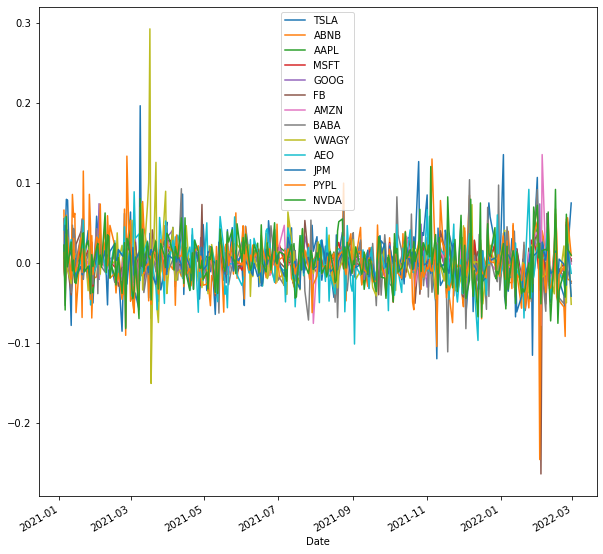

In [13]:
print('Rendimiento diario de las acciones que conforman el portafolio')
performance_Stocks.plot(figsize=(10,10))

**Rendimiento diario de las acciones que conforman el portafolio (Base = '2021-01-01')**

Gráfico del rendimiento diario de las acciones que conforman el portafolio (Base: 2021-01-01)


<AxesSubplot:xlabel='Date'>

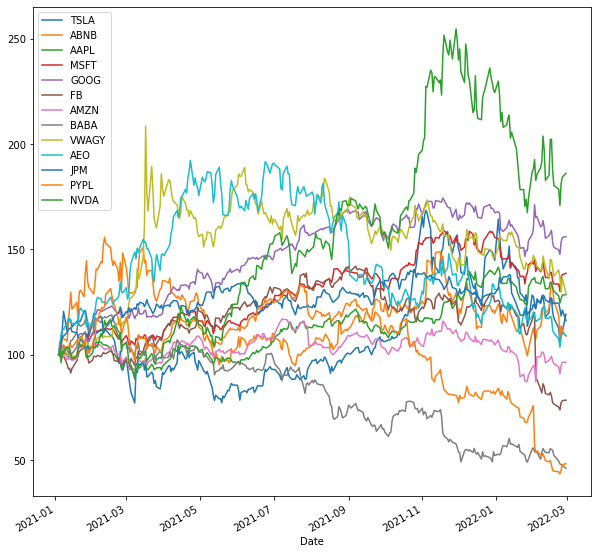

In [14]:
performance_Daily = ((stocks/stocks.iloc[0])*100)
performance_Daily
print('Gráfico del rendimiento diario de las acciones que conforman el portafolio (Base: 2021-01-01)')
performance_Daily.plot(figsize=(10,10))

In [15]:
performance_Daily

,TSLA,ABNB,AAPL,MSFT,GOOG,FB,AMZN,BABA,VWAGY,AEO,JPM,PYPL,NVDA
Date,,,,,,,,,,,,,
2021-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-01-05,100.731733,106.575645,101.236374,100.096460,100.733698,100.754815,101.000434,105.508004,101.280792,104.126819,100.544131,101.289240,102.220987
2021-01-06,103.591537,102.601517,97.828600,97.501025,100.407932,97.906594,98.485861,99.894665,101.527102,110.065441,105.265263,97.805279,96.194745
2021-01-07,111.821527,108.710033,101.166835,100.275619,103.414457,99.925629,99.232105,99.583054,103.325126,111.625565,108.722086,101.345289,101.757719
2021-01-08,120.588678,107.632060,102.040014,100.886580,104.569387,99.490595,99.876674,103.660301,102.413802,111.977858,108.842127,104.544674,101.244901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,112.573826,118.749560,127.921837,133.553065,149.750617,75.139436,94.267300,49.563308,140.267286,107.565696,124.427578,44.485167,178.521571
2022-02-23,104.695994,107.826087,124.613246,130.094939,147.647316,73.789691,90.896657,48.154487,136.558899,103.631621,121.822200,43.428769,170.866287
2022-02-24,109.729092,113.733382,126.691818,136.741960,153.535966,77.191940,94.995654,47.807767,129.718427,108.290385,118.430285,45.282855,181.253968


**Interpretación**
1. Aquellos inversionistas que han adquirido las acciones de TESLA (TSLA) el día '2021-01-01' obtuvieron un beneficio de 19.28% al '2022-02-28'.
2. Aquellos inversionistas que hubieran adquirido las acciones de AIRBNB el día '2021-01-01' hubieran generado una pérdida del 8.87% al '2022-02-28'. 

In [16]:
def performance_Portfolio(performance_Stocks):
    return performance_Stocks.pct_change()

In [17]:
performance_PortfolioMean = performance_Portfolio(performance_Stocks)
performance_PortfolioMean.dropna()
performance_PortfolioMean.mean()

TSLA    -1.602116
ABNB          inf
AAPL     0.012705
MSFT         -inf
GOOG    -1.197764
FB       1.209266
AMZN    -0.172455
BABA    -1.252262
VWAGY   -2.018717
AEO      0.231259
JPM     -0.273959
PYPL         -inf
NVDA         -inf
dtype: float64

**Rendimiento Promedio de las acciones del Portafolio en el periodo en cuestión**

In [18]:
def performance(performance_Stocks):
    return (performance_Stocks.sum())/(performance_Stocks.count())*100

In [19]:
performancePortfolio = performance(performance_Stocks)
print('Rentabilidad Promedio de las acciones que conforman el portafolio (%)')
round(performancePortfolio, 2)

Rentabilidad Promedio de las acciones que conforman el portafolio (%)


TSLA     0.13
ABNB     0.09
AAPL     0.10
MSFT     0.12
GOOG     0.17
FB      -0.05
AMZN     0.00
BABA    -0.23
VWAGY    0.14
AEO      0.07
JPM      0.06
PYPL    -0.21
NVDA     0.26
dtype: float64

In [20]:
import plotly.express as px

In [21]:
performance_Average_Portfolio_Graph = round(performancePortfolio, 2)
performance_Average_Portfolio_Graph = performance_Average_Portfolio_Graph.reset_index().rename_axis('Índice')
performance_Average_Portfolio_Graph.rename(columns={'index':'Compañía', 0:'Rentabilidad promedio de las acciones'}, inplace=True)
performance_Average_Portfolio_Graph

,Compañía,Rentabilidad promedio de las acciones
Índice,,
0,TSLA,0.13
1,ABNB,0.09
2,AAPL,0.10
3,MSFT,0.12
4,GOOG,0.17
5,FB,-0.05
6,AMZN,0.00
7,BABA,-0.23
8,VWAGY,0.14


In [22]:
fig = px.bar(performance_Average_Portfolio_Graph, x='Compañía', y='Rentabilidad promedio de las acciones', text_auto='2.0s', color='Compañía')
fig.show()

**Rentabilidad Logarítmica de las acciones del Portafolio en el periodo en cuestión**

In [23]:
def performanceLn(stocks):
    return np.log(stocks) - np.log(stocks.shift(1))

In [24]:
performanceLnPortfolio = performanceLn(stocks)
performanceLnPortfolio.dropna()
print('Rentabilidad Logarítmica de las acciones que conforman el portafolio (%)')
round(performanceLnPortfolio.mean()*100, 2)

Rentabilidad Logarítmica de las acciones que conforman el portafolio (%)


TSLA     0.06
ABNB     0.03
AAPL     0.09
MSFT     0.11
GOOG     0.15
FB      -0.08
AMZN    -0.01
BABA    -0.27
VWAGY    0.09
AEO      0.03
JPM      0.05
PYPL    -0.25
NVDA     0.21
dtype: float64

In [25]:
import plotly.express as px

In [26]:
performance_Ln_Portfolio_Graph = round(performanceLnPortfolio.mean()*100, 2)
performance_Ln_Portfolio_Graph = performance_Ln_Portfolio_Graph.reset_index().rename_axis('Índice')
performance_Ln_Portfolio_Graph.rename(columns={'index':'Compañía', 0:'Rendimiento logarítmico promedio'}, inplace=True)
performance_Ln_Portfolio_Graph

,Compañía,Rendimiento logarítmico promedio
Índice,,
0,TSLA,0.06
1,ABNB,0.03
2,AAPL,0.09
3,MSFT,0.11
4,GOOG,0.15
5,FB,-0.08
6,AMZN,-0.01
7,BABA,-0.27
8,VWAGY,0.09


In [27]:
fig = px.bar(performance_Ln_Portfolio_Graph, x='Compañía', y='Rendimiento logarítmico promedio', text_auto='2.0s', color='Compañía')
fig.show()

**Varianza del precio de las acciones que conforman el portafolio**

In [28]:
variance_Portfolio = performance_Stocks.var()*100
print('Varianza de las acciones que conforman el portafolio (%)')
var_Portfolio_Round = round(variance_Portfolio, 2)
var_Portfolio_Round

Varianza de las acciones que conforman el portafolio (%)


TSLA     0.13
ABNB     0.12
AAPL     0.03
MSFT     0.02
GOOG     0.03
FB       0.06
AMZN     0.03
BABA     0.08
VWAGY    0.10
AEO      0.08
JPM      0.02
PYPL     0.08
NVDA     0.09
dtype: float64

**Desviación Estándar de las acciones que conforman el portafolio**

In [29]:
desvPortfolio = np.std(performance_Stocks)*100
print('Desviación Estándar de las acciones que conforman el portafolio (%)')
dsv_Portfolio_Round = round(desvPortfolio,2)
dsv_Portfolio_Round

Desviación Estándar de las acciones que conforman el portafolio (%)


TSLA     3.66
ABNB     3.41
AAPL     1.62
MSFT     1.45
GOOG     1.63
FB       2.50
AMZN     1.86
BABA     2.87
VWAGY    3.23
AEO      2.89
JPM      1.45
PYPL     2.79
NVDA     3.02
dtype: float64

In [30]:
union_Stats = pd.concat([var_Portfolio_Round, dsv_Portfolio_Round], axis=1)
union_Stats = union_Stats.reset_index().rename_axis('Índice')
union_Stats = union_Stats.rename(columns={'index':'Compañías', 0:'Varianza', 1:'Desviación Estándar'})
union_Stats

,Compañías,Varianza,Desviación Estándar
Índice,,,
0,TSLA,0.13,3.66
1,ABNB,0.12,3.41
2,AAPL,0.03,1.62
3,MSFT,0.02,1.45
4,GOOG,0.03,1.63
5,FB,0.06,2.50
6,AMZN,0.03,1.86
7,BABA,0.08,2.87
8,VWAGY,0.10,3.23


In [31]:
!pip install plotly

In [32]:
from tqdm import tqdm
import plotly
import plotly.graph_objects as go

In [33]:
graph = go.Figure()
graph.add_trace(go.Bar(x=union_Stats['Compañías'], y= union_Stats['Varianza'],
                      name = 'Varianza', marker_color='indianred'))
graph.update_layout(barmode='group', xaxis_tickangle=-45, 
                   title='Varianza de las acciones que conforman el portafolio')
graph.show()

In [34]:
graph_Desv = go.Figure()
graph_Desv.add_trace(go.Bar(x=union_Stats['Compañías'], y= union_Stats['Desviación Estándar'],
                      name = 'Desviación Estándar', marker_color='salmon'))
graph_Desv.update_layout(barmode='group', xaxis_tickangle=-45, 
                   title='Desviación Estándar de las acciones que conforman el portafolio')
graph_Desv.show()

**Anteriormente, he determinado el rendimiento promedio, rendimiento logarítmico, la varianza y desviación estándar de las acciones que conforman el portafolio. A continuación, presento un cuadro estadístico del dataframe 'performance_Stocks' utilizando la función .describe() de Pandas Python**

In [35]:
performance_Stocks.describe()

,TSLA,ABNB,AAPL,MSFT,GOOG,FB,AMZN,BABA,VWAGY,AEO,JPM,PYPL,NVDA
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,0.001268,0.000866,0.000997,0.001233,0.001668,-0.000498,0.000044,-0.002252,0.001382,0.000720,0.000623,-0.002096,0.002596
std,0.036626,0.034120,0.016191,0.014477,0.016279,0.025001,0.018596,0.028727,0.032309,0.028952,0.014528,0.027998,0.030208
min,-0.119903,-0.091987,-0.041673,-0.042323,-0.046830,-0.263901,-0.078128,-0.111276,-0.150721,-0.101498,-0.061463,-0.245904,-0.082178
25%,-0.019489,-0.018934,-0.008347,-0.005819,-0.005772,-0.011420,-0.009384,-0.018134,-0.015431,-0.016396,-0.007997,-0.014256,-0.013419
50%,0.001490,-0.000881,0.000681,0.000707,0.002242,-0.000136,0.000144,-0.004720,-0.000751,0.000064,0.000241,-0.001224,0.002670
75%,0.019111,0.018192,0.011943,0.010479,0.009061,0.014011,0.010155,0.013384,0.015130,0.018411,0.010990,0.012887,0.020020
max,0.196412,0.133418,0.069778,0.051094,0.073961,0.072973,0.135359,0.103966,0.292519,0.091851,0.046956,0.073561,0.120423


Tras evaluar de manera generar la información extraída de Yahoo Finance de las acciones que conforman el portafolio, se tiene que realizar una aclaración entre portafolio y cartera de inversión. Un portafolio de inversión es aquel que se encuentra conformado por acciones que cotizan en las bolsas de valores del mundo. Una cartera de inversión es un supra conjunto del portafolio de inversión porque agrega la cotización de los bonos para reducir la volatilidad o riesgo de adquirir las acciones. Entonces, en este caso, utilizaré las acciones de las 13 empresas privadas y añadiré el peso y el valor de un activo libre de riesgo con el objetivo de ser usado en la maximización del Sharpe Ratio.

El Sharpe Ratio es una medida del exceso de rendimiento por unidad de riesgo de una inversión. Se expresa matemáticamente de la siguiente manera: $ S_p = \frac{R_p - r_f}{\sigma_p}$

Dado que el objetivo es optimizar la cartera de inversión, puede darse el caso de maximizar la rentabilidad o minimizar la varianza para encontrar los pesos óptimos de inversión.

El presente proyecto es un caso de optimización, por tanto, se debe usar la librería *scipy.optimize*.

In [36]:
#Prueba usando datetime para tener un límite de fechas al momento de solicitar la información
import datetime
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2021,1,31)
tsla = wb.DataReader('TSLA', data_source='yahoo', start=start, end=end)
tsla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,744.489990,717.190002,719.460022,729.770020,48638200,729.770020
2021-01-05,740.840027,719.200012,723.659973,735.109985,32245200,735.109985
2021-01-06,774.000000,749.099976,758.489990,755.979980,44700000,755.979980
2021-01-07,816.989990,775.200012,777.630005,816.039978,51498900,816.039978
2021-01-08,884.489990,838.390015,856.000000,880.020020,75055500,880.020020
2021-01-11,854.429993,803.619995,849.400024,811.190002,59301600,811.190002
2021-01-12,868.000000,827.340027,831.000000,849.440002,46270700,849.440002
2021-01-13,860.469971,832.000000,852.760010,854.409973,33312500,854.409973
2021-01-14,863.000000,838.750000,843.390015,845.000000,31266300,845.000000


Información extraída de https://www.youtube.com/watch?v=f2BCmQBCwDs

In [37]:
returns = stocks/stocks.shift(1)
returns = returns.dropna()
log_Returns = np.log(returns)
log_Returns

,TSLA,ABNB,AAPL,MSFT,GOOG,FB,AMZN,BABA,VWAGY,AEO,JPM,PYPL,NVDA
Date,,,,,,,,,,,,,
2021-01-05,0.007291,0.063685,0.012288,0.000964,0.007310,0.007520,0.009955,0.053617,0.012727,0.040439,0.005427,0.012810,0.021967
2021-01-06,0.027995,-0.038002,-0.034241,-0.026271,-0.003239,-0.028676,-0.025212,-0.054671,0.002429,0.055466,0.045887,-0.035002,-0.060762
2021-01-07,0.076448,0.057831,0.033554,0.028060,0.029504,0.020412,0.007549,-0.003124,0.017555,0.014075,0.032311,0.035555,0.056220
2021-01-08,0.075481,-0.009966,0.008594,0.006074,0.011106,-0.004363,0.006475,0.040127,-0.008859,0.003151,0.001103,0.031081,-0.005052
2021-01-11,-0.081442,-0.011011,-0.023523,-0.009746,-0.022659,-0.040928,-0.021754,-0.038058,-0.026317,0.028795,0.014814,-0.020669,0.025635
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-22,-0.042246,-0.056815,-0.017973,-0.000730,-0.008196,-0.019989,-0.015879,-0.052271,0.020903,-0.024247,-0.001776,-0.004642,-0.010716
2022-02-23,-0.072548,-0.096497,-0.026205,-0.026234,-0.014145,-0.018127,-0.036411,-0.028836,-0.026794,-0.037259,-0.021161,-0.024034,-0.043828
2022-02-24,0.046954,0.053337,0.016543,0.049831,0.039108,0.045076,0.044108,-0.007226,-0.051390,0.043974,-0.028238,0.041806,0.059018


In [38]:
number_Portfolio = 10000
weights = np.zeros((number_Portfolio, len(list_stocks)))
expected_Returns = np.zeros(number_Portfolio)
expected_Volatility = np.zeros(number_Portfolio)
sharpe_Ratio = np.zeros(number_Portfolio)

mean_Log_Returns = log_Returns.mean()
sigma = log_Returns.cov()

for k in range(number_Portfolio):
    #Generar un vector de pesos
    w = np.array(np.random.random(len(list_stocks)))
    w = w / np.sum(w)
    weights[k,:] = w
    #Generar tabla de volatilidad
    expected_Returns[k]= np.sum(mean_Log_Returns * w)
    #Generar tabla de retornos
    expected_Volatility[k] = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    #Generar Sharpe Ratio
    active_Risk_Free = 0.0015
    sharpe_Ratio[k] = (expected_Returns[k]-active_Risk_Free)/expected_Volatility[k]

In [39]:
maxIndex = sharpe_Ratio.argmax()
weights[maxIndex,:]

array([0.04317388, 0.20689792, 0.00304078, 0.21134772, 0.21775097,
       0.03212168, 0.02876519, 0.0037797 , 0.01010848, 0.00818028,
       0.00724006, 0.01070268, 0.21689066])

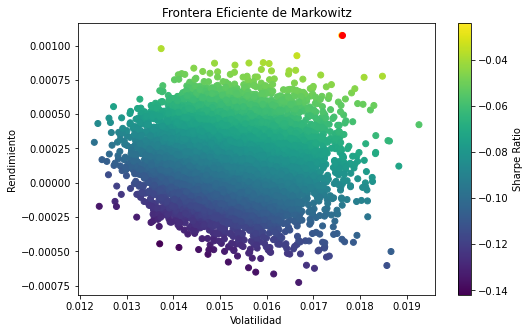

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(expected_Volatility, expected_Returns, c=sharpe_Ratio)
plt.title('Frontera Eficiente de Markowitz')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(expected_Volatility[maxIndex], expected_Returns[maxIndex], c='red')
plt.show()

Información extraída de https://www.youtube.com/watch?v=f2BCmQBCwDs&t=1133s

In [41]:
from scipy.optimize import minimize

In [42]:
def negativeSR(w):
    w = np.array(w)
    R = np.sum(mean_Log_Returns * w)
    V = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    SR = R/V
    return -1*SR

def checkSumToOne(w):
    return np.sum(w)-1
w0 = [7.692307692307692, 7.692307692307692, 7.692307692307692,7.692307692307692, 7.692307692307692, 7.692307692307692,7.692307692307692,7.692307692307692,7.692307692307692,7.692307692307692,7.692307692307692,7.692307692307692,7.692307692307692]
bounds = ((0,1), (0,1), (0,1),(0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1))
constraints = ({'type':'eq', 'fun':checkSumToOne})
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints)
w_opt

     fun: -0.09915762717912033
     jac: array([ 6.83572162e-02,  5.47574777e-02,  1.12780612e-02,  1.32583082e-05,
       -3.55765224e-06,  1.66415916e-01,  8.97182757e-02,  2.37166105e-01,
        2.94549391e-04,  4.01364760e-02, -5.29671088e-05,  2.57788558e-01,
        3.73432413e-05])
 message: 'Optimization terminated successfully'
    nfev: 280
     nit: 20
    njev: 20
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.14216137e-02,
       6.21311739e-01, 4.02240904e-17, 3.77045287e-17, 1.77251470e-16,
       2.09338918e-02, 5.89407356e-17, 1.70017191e-01, 3.19537374e-16,
       1.06315565e-01])

In [43]:
w_opt.x

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.14216137e-02,
       6.21311739e-01, 4.02240904e-17, 3.77045287e-17, 1.77251470e-16,
       2.09338918e-02, 5.89407356e-17, 1.70017191e-01, 3.19537374e-16,
       1.06315565e-01])

In [44]:
returns = np.linspace(-0.00075, 0.0015,20)
volatility_opt = []
def minimizeMyVolatility(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    return V
def getReturn(w):
    w = np.array(w)
    R = np.sum(mean_Log_Returns * w)
    return R
for R in returns:
    #Encontrar la menor volatilidad
    constraints = ({'type':'eq', 'fun':checkSumToOne},
                  {'type':'eq', 'fun': lambda w:getReturn(w) - R})
    opt = minimize(minimizeMyVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints)
    #Guardar la volatilidad óptima
    volatility_opt.append(opt['fun'])

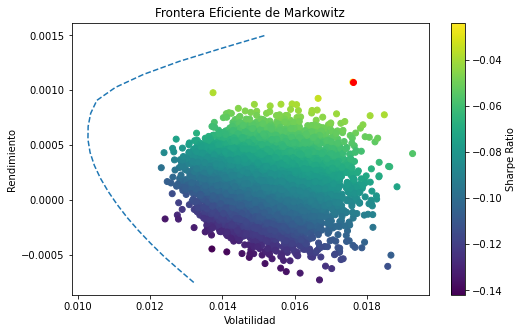

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(expected_Volatility, expected_Returns, c=sharpe_Ratio)
plt.title('Frontera Eficiente de Markowitz')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(expected_Volatility[maxIndex], expected_Returns[maxIndex], c='red')
plt.plot(volatility_opt, returns, '--')
plt.show()

Información extraída de https://www.youtube.com/watch?v=f2BCmQBCwDs&t=1133s

**El anterior procedimiento es una de diversas formas de realizar la optimización de Markowitz, a continuación, presentaré un procedimiento que se enfoca en la realización de gráficos interactivos con nuevas librerías de Python.**

In [46]:
!pip install plotly

In [47]:
from tqdm import tqdm
import plotly
import plotly.graph_objects as go

In [48]:
performance_Stocks2 = (1+log_Returns.mean())**251-1
performance_Stocks2 = performance_Stocks2.dropna()
performance_Stocks2

TSLA     0.164752
ABNB     0.076301
AAPL     0.242645
MSFT     0.327020
GOOG     0.469841
FB      -0.189388
AMZN    -0.031415
BABA    -0.488224
VWAGY    0.248476
AEO      0.078443
JPM      0.138541
PYPL    -0.468121
NVDA     0.711009
dtype: float64

In [49]:
cov_performance_Stocks2 = log_Returns.cov()
cov_performance_Stocks2

,TSLA,ABNB,AAPL,MSFT,GOOG,FB,AMZN,BABA,VWAGY,AEO,JPM,PYPL,NVDA
TSLA,0.001318,0.000431,0.000291,0.000230,0.000203,0.000266,0.000256,0.000312,0.000215,0.000132,0.000063,0.000446,0.000553
ABNB,0.000431,0.001143,0.000180,0.000129,0.000130,0.000236,0.000199,0.000287,0.000209,0.000230,0.000052,0.000317,0.000411
AAPL,0.000291,0.000180,0.000261,0.000160,0.000150,0.000183,0.000167,0.000098,0.000112,0.000082,0.000029,0.000201,0.000281
MSFT,0.000230,0.000129,0.000160,0.000210,0.000175,0.000200,0.000157,0.000075,0.000073,0.000057,0.000008,0.000168,0.000281
GOOG,0.000203,0.000130,0.000150,0.000175,0.000263,0.000233,0.000169,0.000085,0.000094,0.000103,0.000044,0.000131,0.000270
FB,0.000266,0.000236,0.000183,0.000200,0.000233,0.000708,0.000260,0.000171,0.000135,0.000135,0.000036,0.000312,0.000354
AMZN,0.000256,0.000199,0.000167,0.000157,0.000169,0.000260,0.000342,0.000118,0.000078,0.000107,0.000029,0.000231,0.000313
BABA,0.000312,0.000287,0.000098,0.000075,0.000085,0.000171,0.000118,0.000822,0.000116,0.000041,0.000051,0.000259,0.000182
VWAGY,0.000215,0.000209,0.000112,0.000073,0.000094,0.000135,0.000078,0.000116,0.000976,0.000161,0.000118,0.000115,0.000189
AEO,0.000132,0.000230,0.000082,0.000057,0.000103,0.000135,0.000107,0.000041,0.000161,0.000842,0.000160,0.000128,0.000199


In [50]:
n_assets = 13
n_portfolios = 1000
mean_variance_pairs = []
np.random.seed(75)

for i in range(n_portfolios):
    assets = np.random.choice(list(log_Returns.columns), n_assets, replace=False)
    weights = np.random.rand(n_assets)
    weights = weights/sum(weights)
    
    portfolio_A_return = 0
    portfolio_A_variance = 0
    
    for i in range(len(assets)):
        portfolio_A_return += weights[i] * performance_Stocks2.loc[assets[i]]
        
        for j in range(len(assets)):
            portfolio_A_variance += weights[i] * weights[j] * cov_performance_Stocks2.loc[assets[i], assets[j]]
    mean_variance_pairs.append([portfolio_A_return, portfolio_A_variance])

In [51]:
#mean_variance_pairs

In [52]:
mean_variance_pairs = np.array(mean_variance_pairs)
mean_variance_pairs

array([[0.08195138, 0.00022314],
       [0.02028859, 0.00020751],
       [0.0923572 , 0.00024596],
       ...,
       [0.10789675, 0.00022851],
       [0.19044689, 0.0002093 ],
       [0.04725327, 0.00019979]])

In [53]:
risk_free_rate = 0.0015
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:, 1]**0.5, y=mean_variance_pairs[:,0],
                        marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5),
                                   showscale= True,
                                   size = 7,
                                   line = dict(width=1),
                                   colorscale="RdBu",
                                   colorbar=dict(title="Sharpe<br>Ratio")
                                   ),
                        mode='markers'))
fig.update_layout(template='plotly_white',
                 xaxis=dict(title='Nivel de riesgo (Volatilidad)'),
                 yaxis=dict(title='Niveld de rendimiento'),
                 title='Carteras de inversión aleatorias',
                 width = 850,
                 height=500)
fig.update_xaxes(range=[0.0, 0.05])
fig.update_yaxes(range=[-0.001, 0.030])
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))

Información extraída de https://www.youtube.com/watch?v=qJ5yCvA5E3Q

**Portafolio de Markowitz - Frontera Eficiente (Forma 2)**

Extraído de https://www.youtube.com/watch?v=Usxer0D-WWM&list=WL&index=1&t=348s

In [54]:
!pip install quandl

In [55]:
import seaborn as sns
import quandl
import scipy.optimize as sco

In [56]:
np.random.seed(777)

Text(0, 0.5, 'Rendimientos diarios')

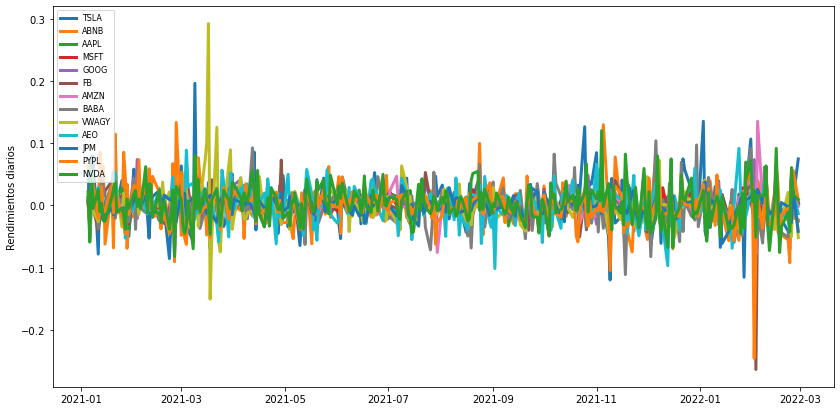

In [57]:
#Rendimientos diarios
return2_Daily = stocks.pct_change()
plt.figure(figsize=(14,7))
for a in return2_Daily.columns.values:
    plt.plot(return2_Daily.index, return2_Daily[a], lw=3, alpha=1, label=a)
plt.legend(loc='upper left', fontsize=8)
plt.ylabel('Rendimientos diarios')

In [58]:
#Función que determinar el rendimiento promedio y la desviación estándar del portafolio
def portfolio_Annualised_Performance(weights2, mean2_Returns, cov2_Matrix):
    return2_Daily = np.sum(mean2_Returns*weights2)
    std2 = np.sqrt(np.dot(weights2.T, np.dot(cov2_Matrix, weights2)))
    return std2, return2_Daily

In [59]:
#Función para crear portafolios aleatorios
def random2_Portfolios(number2_Portfolios, mean2_Returns, cov2_Matrix, risk_Free_Rate):
    results2 = np.zeros((12, number2_Portfolios))
    weights2_Record = []
    for i in range(number2_Portfolios):
        weights2 = np.random.random(13)
        weights2 /= np.sum(weights2)
        weights2_Record.append(weights2)
        portfolio2_Std_Dev, portfolio2_Returns = portfolio_Annualised_Performance(weights2, mean2_Returns, cov2_Matrix)
        results2[0, i] = portfolio2_Std_Dev
        results2[1, i] = portfolio2_Returns
        results2[2, i] = (portfolio2_Returns - risk_Free_Rate)/portfolio2_Std_Dev
    return results2, weights2_Record

In [65]:
#Valores que serán aplicados sobre las funciones
return2_Portfolio = stocks.pct_change()
return2_Portfolio = return2_Portfolio.dropna()
mean2_Returns = return2_Portfolio.mean()
cov2_Matrix = return2_Portfolio.cov()
number2_Portfolios = 10000
risk_Free_Rate = 0.0015

In [90]:
#Proceso de visualización de datos
def graph_Simulated(mean2_Returns, cov2_Matrix, number2_Portfolios, risk_Free_Rate):
    
    results2, weights2 = random2_Portfolios(number2_Portfolios, mean2_Returns, cov2_Matrix, risk_Free_Rate)
    
    max_Sharpe_Idx = np.argmax(results2[2])
    sdp, rp = results2[0, max_Sharpe_Idx], results2[1, max_Sharpe_Idx]
    max_Sharpe_Allocation = pd.DataFrame(weights2[max_Sharpe_Idx], index=stocks.columns, columns=['allocation'])
    max_Sharpe_Allocation.allocation = [round(i*100, 4) for i in max_Sharpe_Allocation.allocation]
    max_Sharpe_Allocation = max_Sharpe_Allocation.T
    
    min_Vol_Idx = np.argmin(results2[0])
    sdp_Min, rp_Min = results2[0, min_Vol_Idx], results2[1, min_Vol_Idx]
    min_Vol_Allocation = pd.DataFrame(weights2[min_Vol_Idx], index=stocks.columns, columns=['allocation'])
    min_Vol_Allocation.allocation = [round(i*100,4) for i in min_Vol_Allocation.allocation]
    min_Vol_Allocation = min_Vol_Allocation.T
    
    print("_"*100)
    print("Sharpe Ratio Máximo\n")
    print("Rendimiento promedio del portafolio: ", round(rp, 4))
    print("Riesgo promedio del portafolio: ", round(sdp, 4))
    print("\n")
    print(max_Sharpe_Allocation)
    print("_"*100)
    print("Volatilidad mínima")
    print("Rendimiento promedio del portafolio: ", round(rp_Min, 4))
    print("Riesgo promedio del portafolio: ", round(sdp_Min, 4))
    print("\n")
    print(min_Vol_Allocation)

    plt.figure(figsize=(10,7))
    plt.scatter(results2[0,:], results2[1,:], c=results2[2,:], cmap='inferno', marker='o', s=10, alpha=0.5)
    plt.colorbar()
    plt.title('Frontera Eficiente de Markowitz')
    plt.xlabel('Desviación Estándar')
    plt.ylabel('Rendimiento Esperado')
    plt.scatter(sdp, rp, marker='.', color='r', s=400, label='Sharpe Ratio Máximo')
    plt.scatter(sdp_Min, rp_Min, marker='.', color='g', s=400, label='Volatilidad Mínima')
    plt.legend(labelspacing=0.8)

____________________________________________________________________________________________________
Sharpe Ratio Máximo

Rendimiento promedio del portafolio:  0.0013
Riesgo promedio del portafolio:  0.0166


              TSLA    ABNB    AAPL     MSFT     GOOG      FB    AMZN    BABA  \
allocation  5.6814  1.3844  6.4084  17.0871  20.7793  2.7033  1.8711  5.4529   

             VWAGY     AEO     JPM    PYPL     NVDA  
allocation  3.1566  4.2243  1.5432  3.4195  26.2885  
____________________________________________________________________________________________________
Volatilidad mínima
Rendimiento promedio del portafolio:  0.0006
Riesgo promedio del portafolio:  0.0123


              TSLA    ABNB    AAPL     MSFT     GOOG      FB     AMZN    BABA  \
allocation  0.5223  9.2243  8.4274  11.6939  15.0437  1.1833  11.2689  9.3178   

             VWAGY     AEO      JPM    PYPL    NVDA  
allocation  0.5378  4.4409  21.8662  1.3194  5.1541  


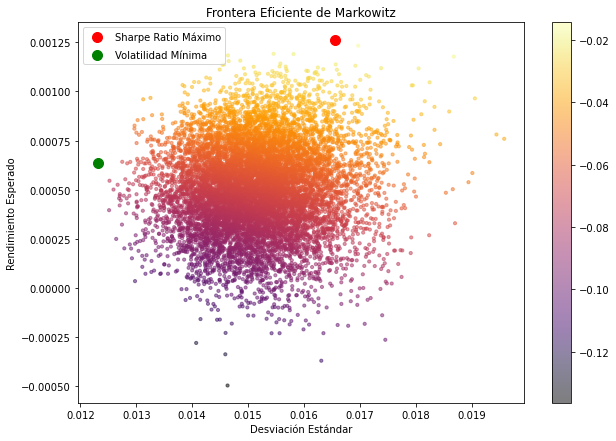

In [91]:
    graph_Simulated(mean2_Returns, cov2_Matrix, number2_Portfolios, risk_Free_Rate)